# E.D.A (Exploratory Data Analysis)

## Importamos las librerias a utilizar

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

## Leemos los archivos a los cuales les haremos el EDA

In [2]:
reviews_indiana = pd.read_parquet("../../Datasets/merge/indiana_sitios.parquet")
reviews_louisiana = pd.read_parquet("../../Datasets/merge/louisiana_sitios.parquet")

In [3]:
reviews_indiana["year"] = reviews_indiana["date"].dt.year
reviews_louisiana["year"] = reviews_louisiana["date"].dt.year

In [4]:
reviews_louisiana_copy = reviews_louisiana.copy()
reviews_indiana_copy = reviews_indiana.copy()

- Realizamos el describe para detectar anomalias en los datos

In [27]:
reviews_indiana.describe()

,user_id,rating,date,latitude,longitude,avg_rating,num_of_reviews,year
count,1.131137e+06,1.131137e+06,1131137,1.131137e+06,1.131137e+06,1.131137e+06,1.131137e+06,1.131137e+06
mean,1.092967e+20,4.292955e+00,2019-04-19 12:41:36.716207872,4.012013e+01,-8.624136e+01,4.267434e+00,6.809483e+02,2.018807e+03
min,1.000000e+20,1.000000e+00,2007-06-20 18:27:10.900000,3.784492e+01,-8.795666e+01,1.000000e+00,5.000000e+00,2.007000e+03
25%,1.047148e+20,4.000000e+00,2018-05-28 22:13:50.063000064,3.961148e+01,-8.672743e+01,4.000000e+00,5.600000e+01,2.018000e+03
50%,1.092913e+20,5.000000e+00,2019-05-16 12:33:23.761999872,3.989374e+01,-8.613966e+01,4.400000e+00,1.280000e+02,2.019000e+03
75%,1.138618e+20,5.000000e+00,2020-03-22 05:02:59.057999872,4.110662e+01,-8.583257e+01,4.600000e+00,6.860000e+02,2.020000e+03
max,1.184467e+20,5.000000e+00,2021-09-07 21:40:56.679000,4.175905e+01,-8.480624e+01,5.000000e+00,9.728000e+03,2.021000e+03
std,5.283430e+18,1.130763e+00,NaN,1.004759e+00,7.039956e-01,4.664594e-01,1.331542e+03,1.365513e+00


In [28]:
reviews_louisiana.describe()

,user_id,rating,date,latitude,longitude,avg_rating,num_of_reviews,year
count,6.132960e+05,613296.000000,613296,613296.000000,613296.000000,613296.000000,613296.000000,613296.000000
mean,1.092753e+20,4.324197,2019-04-13 05:32:08.460015616,30.621589,-91.395082,4.287631,502.127478,2018.794342
min,1.000001e+20,1.000000,2001-05-25 00:00:00,29.035796,-118.341058,1.200000,5.000000,2001.000000
25%,1.047095e+20,4.000000,2018-06-03 11:51:48.579999744,29.985479,-92.223450,4.100000,48.000000,2018.000000
50%,1.092296e+20,5.000000,2019-05-05 02:26:08.577999872,30.287694,-91.091800,4.400000,98.000000,2019.000000
75%,1.138513e+20,5.000000,2020-02-23 23:39:44.770749952,30.672496,-90.153478,4.600000,257.000000,2020.000000
max,1.184466e+20,5.000000,2021-09-07 16:37:34.679000,34.074050,-89.331274,5.000000,9998.000000,2021.000000
std,5.269314e+18,1.115235,NaN,0.895056,1.261411,0.441662,1319.215576,1.342767


### Observaciones
- No se observan valores disruptivos dentro de las columnas de tipo numericas, respetan los rangos donde se deberian encontrar sus valores

In [36]:
reviews_indiana[["avg_rating","num_of_reviews","rating","year"]].corr()

,avg_rating,num_of_reviews,rating,year
avg_rating,1.000000,-0.050986,0.353738,0.091172
num_of_reviews,-0.050986,1.000000,-0.021096,-0.050328
rating,0.353738,-0.021096,1.000000,0.064997
year,0.091172,-0.050328,0.064997,1.000000


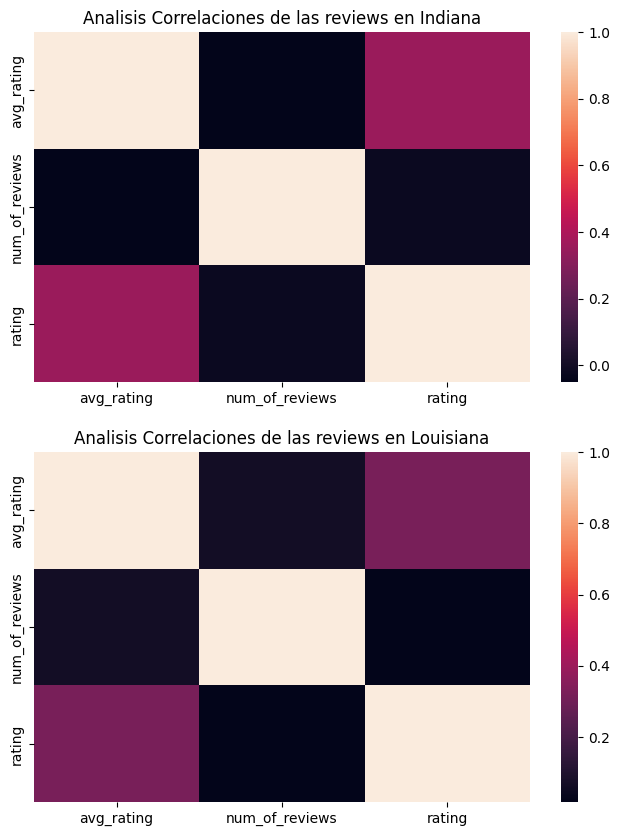

In [55]:
fig,ax= plt.subplots(2,1,figsize=(8,10))
# fig.subplots_adjust(hspace=1)
ax[0].set(title="Analisis Correlaciones de las reviews en Indiana")
sns.heatmap(reviews_indiana[["avg_rating","num_of_reviews","rating"]].corr(),ax=ax[0])

ax[1].set(title="Analisis Correlaciones de las reviews en Louisiana")
sns.heatmap(reviews_louisiana[["avg_rating","num_of_reviews","rating"]].corr(),ax=ax[1])

plt.show()

### Observaciones
- Se puede observar, que un aumento en el numero de las reseñas, no necesariamente trae consigo un aumento en el puntaje del lugar
- Ademas se destaca el aumento del promedio de las reseñas cuando el puntaje va aumentando. Aunque esto no se ve tan marcado, ya que en un mismo lugar el promedio de las reseñas no varia ya que es un valor ya designado, los puntajes van variando, haciendo que esta correlacion no sea tan notoria

### Análisis de ***reviews*** en <b>Indiana</b>

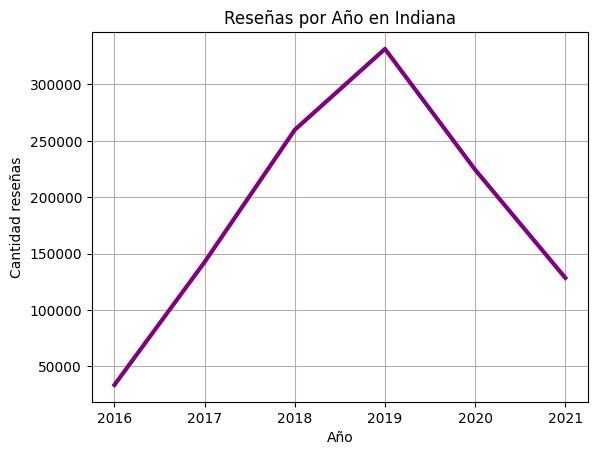

In [5]:
sns.lineplot(reviews_indiana["year"].value_counts(ascending=False)[0:6], color="purple",linewidth = 3 )
plt.grid()
plt.ylabel("Cantidad reseñas")
plt.xlabel("Año")
plt.title("Reseñas por Año en Indiana")
plt.show()

### Análisis de ***reviews*** en <b>Indiana</b>

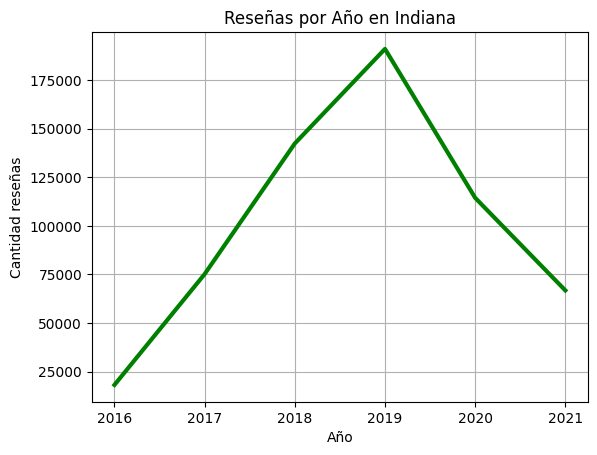

In [6]:
sns.lineplot(reviews_louisiana["year"].value_counts(ascending=False)[0:6], color="green",linewidth = 3 )
plt.grid()
plt.ylabel("Cantidad reseñas")
plt.xlabel("Año")
plt.title("Reseñas por Año en Indiana")
plt.show()

### Observaciones
- Los graficos indican un marcado aumento hasta el año 2019, luego, en el año 2020 las mismas decaen. Se podria suponer que esto es debido a la pandemia ocurrida en el mismo año. A pesar de esto, el año 2021 no parece retomar los valores que se encontraban en el año 2019. Cabe aclarar, como se vio en el apartado donde se realizo el *describe* de los datasets, contamos con datos hasta la fecha de **2021-09-07**, capaz, en el ultimo transcurso del año, esto podria remontar a valores pasados.

### Analisis por categorias de interes

## **Louisiana**

In [7]:
hotels_la = reviews_louisiana[reviews_louisiana["category"].str.contains("Hotel|hotel")]
restaurant_la = reviews_louisiana[reviews_louisiana["category"].str.contains("Restaurant|restaurant")]

In [8]:
hotels_la.shape,restaurant_la.shape

((1363, 16), (158312, 16))

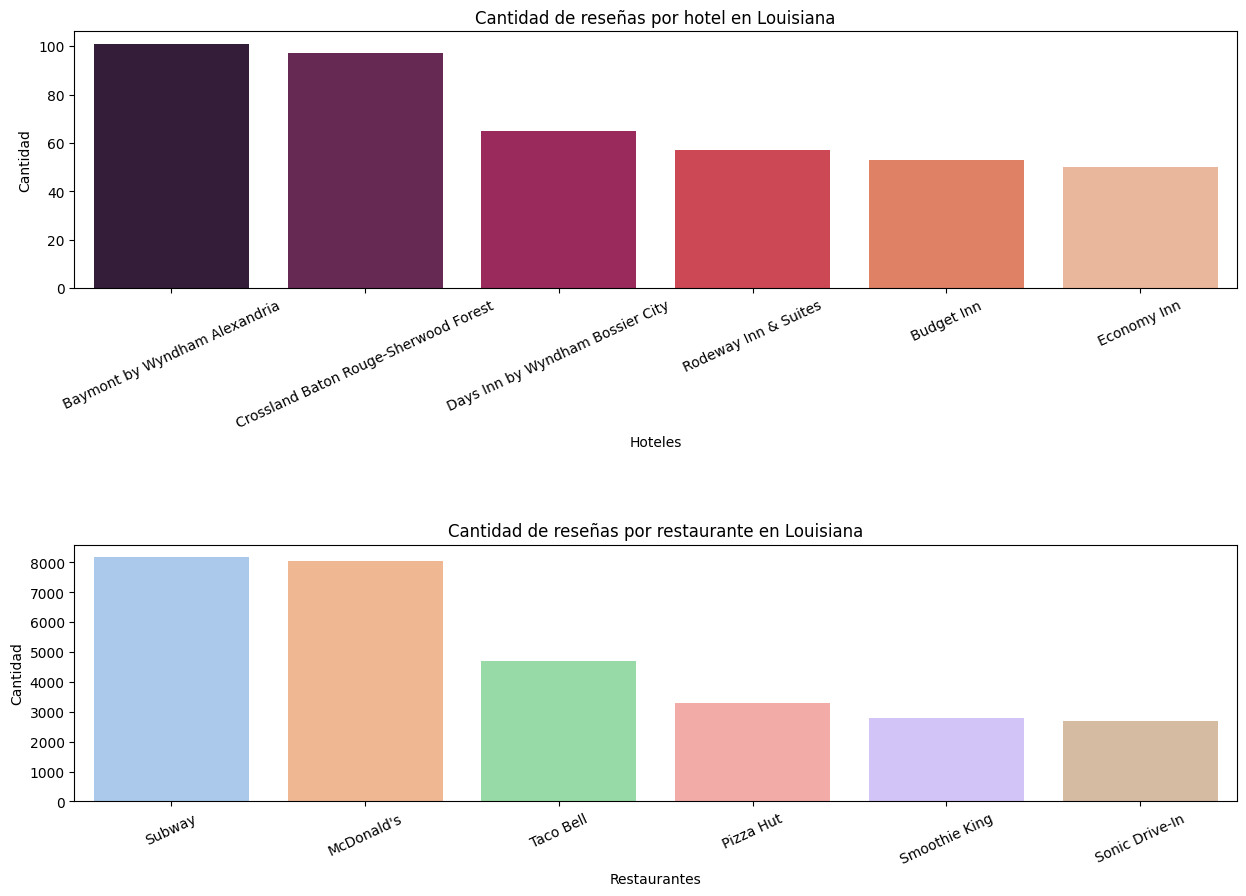

In [9]:
fig,ax = plt.subplots(2,1,figsize=(15,10))
fig.subplots_adjust(hspace=1)
ax[0].tick_params(axis='x', rotation=25)
ax[0].set(xlabel="Hoteles",ylabel="Cantidad", title="Cantidad de reseñas por hotel en Louisiana")
sns.barplot(hotels_la["name"].value_counts()[0:6],ax=ax[0], palette="rocket")

ax[1].tick_params(axis='x', rotation=25)
ax[1].set(xlabel="Restaurantes",ylabel="Cantidad", title="Cantidad de reseñas por restaurante en Louisiana")
sns.barplot(restaurant_la["name"].value_counts()[0:6],ax=ax[1], palette="pastel")



plt.show()

## **Indiana**

In [10]:
hotels_in = reviews_indiana[reviews_indiana["category"].str.contains("Hotel|hotel")]
restaurant_in = reviews_indiana[reviews_indiana["category"].str.contains("Restaurant|restaurant")]

In [11]:
hotels_in.shape,restaurant_in.shape

((726, 16), (305721, 16))

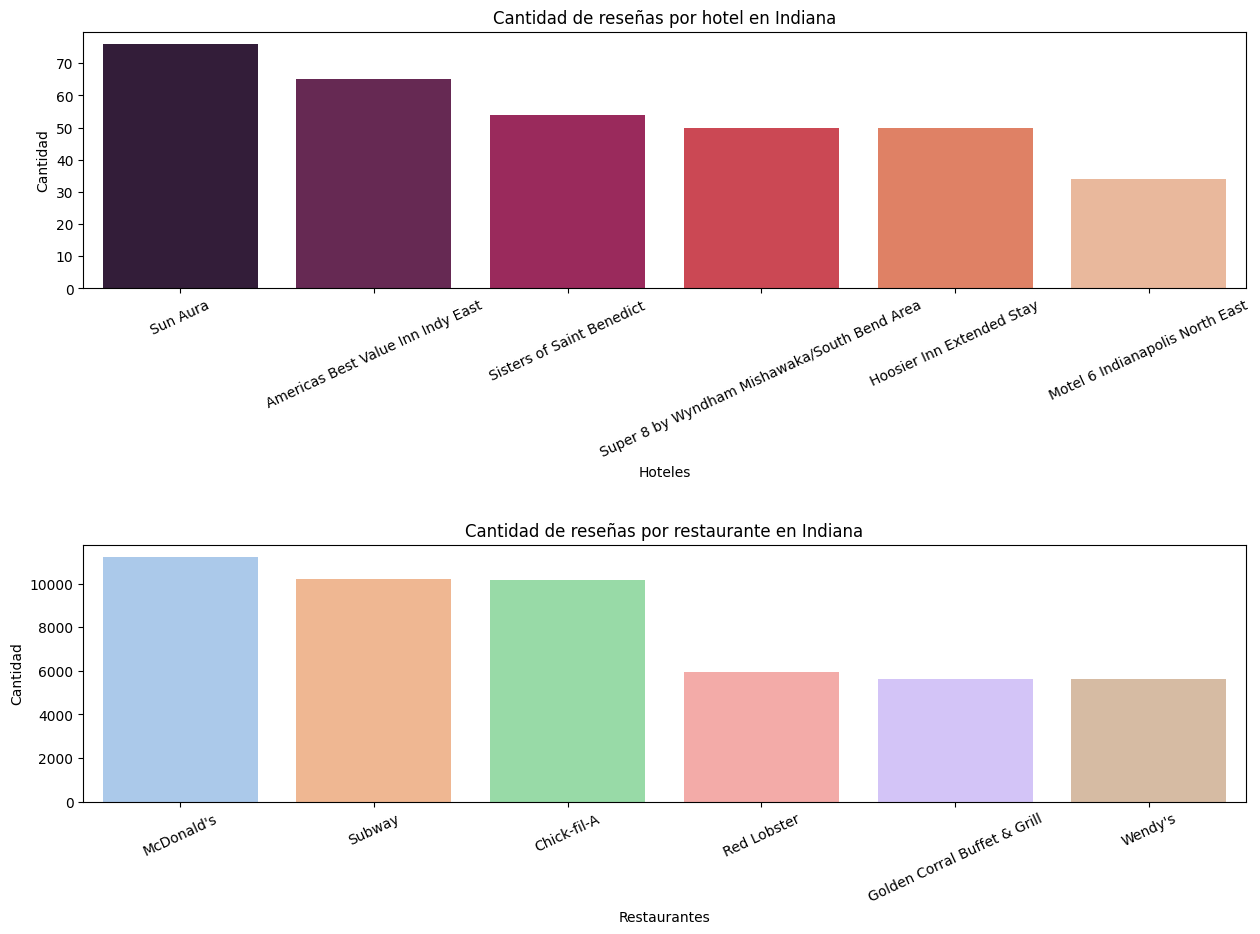

In [12]:
fig,ax = plt.subplots(2,1,figsize=(15,10))
fig.subplots_adjust(hspace=1)
ax[0].tick_params(axis='x', rotation=25)
ax[0].set(xlabel="Hoteles",ylabel="Cantidad", title="Cantidad de reseñas por hotel en Indiana")
sns.barplot(hotels_in["name"].value_counts()[0:6],ax=ax[0], palette="rocket")

ax[1].tick_params(axis='x', rotation=25)
ax[1].set(xlabel="Restaurantes",ylabel="Cantidad", title="Cantidad de reseñas por restaurante en Indiana")
sns.barplot(restaurant_in["name"].value_counts()[0:6],ax=ax[1], palette="pastel")



plt.show()

## **Yelp Reviews**

In [13]:
yelp_reviews = pd.read_parquet("../../Datasets/business_reviews.parquet")

In [14]:
yelp_reviews["date"] = pd.to_datetime(yelp_reviews["date"])

In [15]:
yelp_reviews["year"] = yelp_reviews["date"].dt.year

In [16]:
indiana_yelp = yelp_reviews[yelp_reviews["state"]=="Indiana"]
lousiana_yelp = yelp_reviews[yelp_reviews["state"]=="Louisiana"]

### Describe de los datasets

In [58]:
indiana_yelp.describe()

,postal_code,latitude,longitude,stars_mean,review_count,is_open,stars_review,useful,funny,cool,date,year
count,489401.000000,489401.000000,489401.000000,489401.000000,489401.000000,489401.000000,489401.000000,489401.000000,489401.000000,489401.000000,489401,489401.0
mean,46187.371229,39.827663,-86.148102,3.796183,219.996475,0.818022,3.789103,1.079107,0.201969,0.476685,2017-06-13 19:05:40.990054912,2016.952485
min,46006.000000,39.550154,-86.498924,1.000000,5.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2005-05-24 00:29:10,2005.0
25%,46168.000000,39.765797,-86.160537,3.500000,39.000000,1.000000,3.000000,0.000000,0.000000,0.000000,2015-08-08 00:01:04,2015.0
50%,46205.000000,39.825548,-86.145180,4.000000,117.000000,1.000000,4.000000,0.000000,0.000000,0.000000,2017-11-04 14:02:09,2017.0
75%,46231.000000,39.911951,-86.108059,4.500000,280.000000,1.000000,5.000000,1.000000,0.000000,1.000000,2019-08-16 15:48:06,2019.0
max,47448.000000,39.999860,-85.852662,5.000000,2233.000000,1.000000,5.000000,122.000000,131.000000,113.000000,2022-01-19 19:36:50,2022.0
std,72.945763,0.096914,0.085934,0.768133,311.873260,0.385826,1.440496,2.093038,0.915222,1.325228,NaN,2.890571


In [61]:
lousiana_yelp.describe()

,postal_code,latitude,longitude,stars_mean,review_count,is_open,stars_review,useful,funny,cool,date,year
count,761613.000000,761613.000000,761613.000000,761613.000000,761613.000000,761613.000000,761613.000000,761613.000000,761613.000000,761613.000000,761613,761613.0
mean,70108.350221,29.956275,-90.089161,3.877402,935.059746,0.844634,3.881475,1.103910,0.363325,0.535671,2016-11-03 00:59:31.706381056,2016.356356
min,70001.000000,29.772301,-90.349771,1.000000,5.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2005-03-14 18:07:51,2005.0
25%,70115.000000,29.945088,-90.100819,3.500000,93.000000,1.000000,3.000000,0.000000,0.000000,0.000000,2014-11-26 04:04:52,2014.0
50%,70118.000000,29.955294,-90.069806,4.000000,320.000000,1.000000,4.000000,0.000000,0.000000,0.000000,2017-03-24 04:32:31,2017.0
75%,70130.000000,29.963657,-90.065354,4.500000,1038.000000,1.000000,5.000000,1.000000,0.000000,0.000000,2019-02-21 03:27:17,2019.0
max,70458.000000,30.133632,-89.861298,5.000000,7568.000000,1.000000,5.000000,262.000000,201.000000,261.000000,2022-01-19 19:48:13,2022.0
std,36.951682,0.026941,0.047000,0.631887,1485.572005,0.362254,1.377743,2.677628,1.535154,2.013306,NaN,2.997853


- Al igual que el *describe* realizado con los datos de *Google*, los datos de *Yelp*, tampoco presentan anomalias detectables.

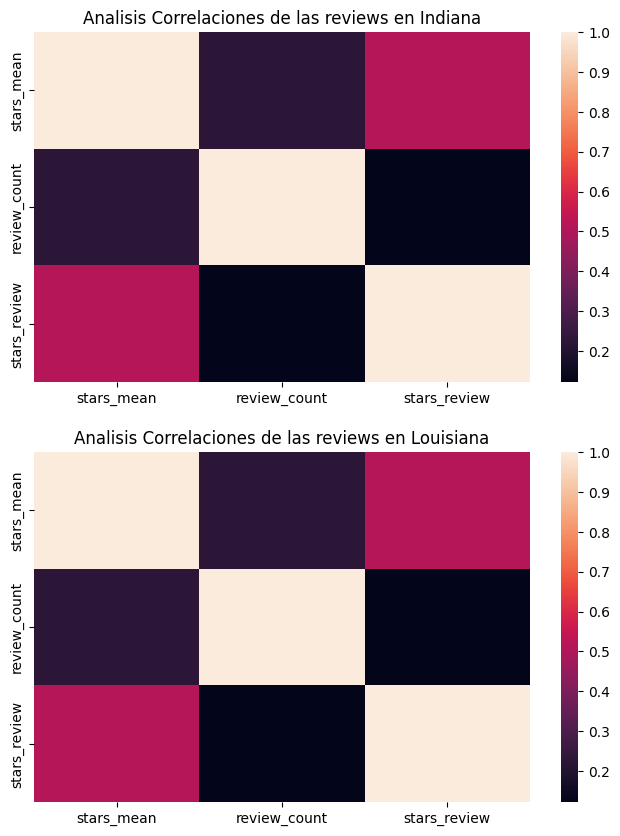

In [62]:
fig,ax= plt.subplots(2,1,figsize=(8,10))
# fig.subplots_adjust(hspace=1)
ax[0].set(title="Analisis Correlaciones de las reviews en Indiana")
sns.heatmap(indiana_yelp[["stars_mean","review_count","stars_review"]].corr(),ax=ax[0])

ax[1].set(title="Analisis Correlaciones de las reviews en Louisiana")
sns.heatmap(indiana_yelp[["stars_mean","review_count","stars_review"]].corr(),ax=ax[1])

plt.show()

### Observaciones
- A comparacion con el mapa de calor presentado al principio del documento, en este grafico, es más notorio la correlacion entre el promedio de las puntuaciones (``stars_mean``) y la puntacion de cada usuario (`star_rating`).

### Cantidad de reseñas por años en *Indiana*

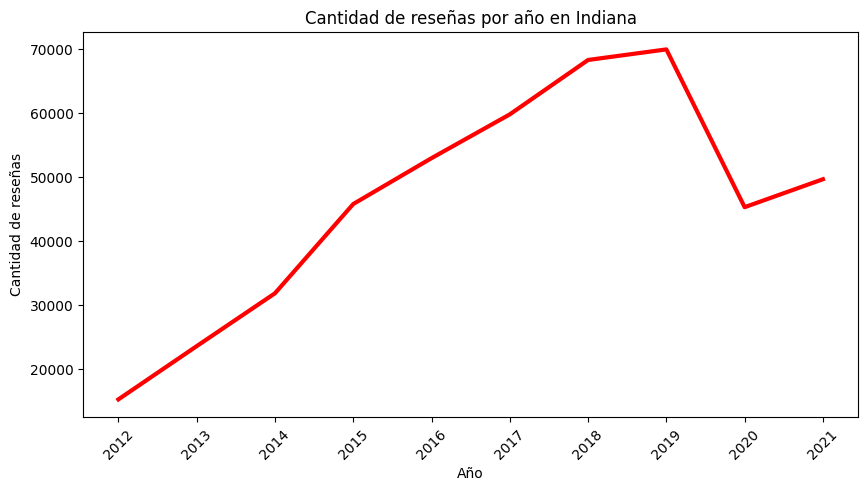

In [17]:
indiana_yelp["year"]=indiana_yelp["year"].astype("Int64")
fig,ax=plt.subplots(figsize=(10,5))
plt.xticks(rotation=45)
sns.lineplot(indiana_yelp["year"].value_counts(ascending=False)[0:10],linewidth=3, color="red")
plt.title("Cantidad de reseñas por año en Indiana")
plt.ylabel("Cantidad de reseñas")
plt.xlabel("Año")
plt.xticks(indiana_yelp["year"].value_counts().index[0:10])
plt.show()

### Cantidad de reseña por años en *Lousiana*

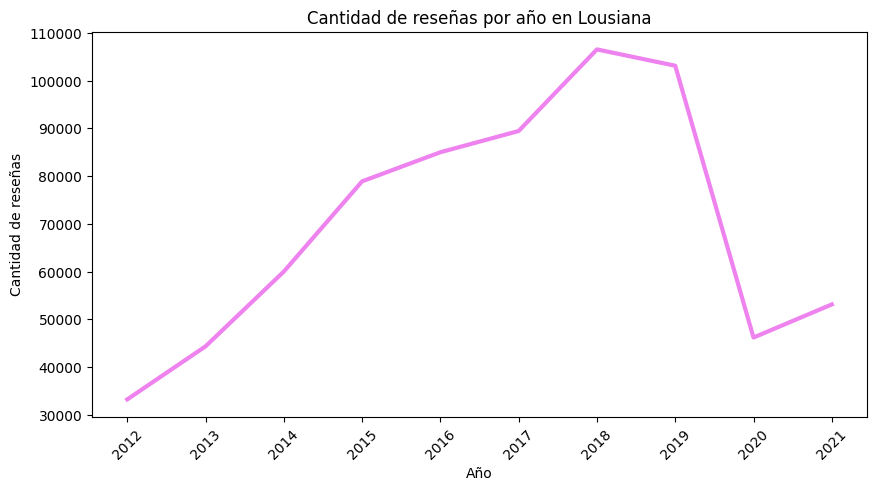

In [18]:
lousiana_yelp["year"]=lousiana_yelp["year"].astype("Int64")
fig,ax=plt.subplots(figsize=(10,5))
plt.xticks(rotation=45)
sns.lineplot(lousiana_yelp["year"].value_counts(ascending=False)[0:10],linewidth=3, color="violet")
plt.xticks(lousiana_yelp["year"].value_counts().index[0:10])
plt.title("Cantidad de reseñas por año en Lousiana")
plt.ylabel("Cantidad de reseñas")
plt.xlabel("Año")
plt.show()

### Conclusion respecto a la cantidad de reseñas por año.

- Como se visualizo en el *dataset* de *Google*, este no contenia todos los registros del año 2021, sin embargo, en los datos encontrados de Yelp, si encontramos tales registros. Gracias a estos datos, podemos concluir que no se ha llegado a alcanzar la cantidad de reviews con respecto a años anteriores. Esto puede llevar a muchas suposiciones, como por ejemplo, que la clientela a bajado. Sin embargo no podemos realizar tal hipotesis cuando carecemos los datos.

### Analisis de los lugares de interes por estado

In [65]:
# Rellenamos los valores faltantes
indiana_yelp.fillna({"categories":""},inplace=True)
lousiana_yelp.fillna({"categories":""},inplace=True)

In [20]:
hotels_yelp_in = indiana_yelp[indiana_yelp["categories"].str.contains("Hotel|hotel")]
restaurant_yelp_in = indiana_yelp[indiana_yelp["categories"].str.contains("Restaurant|restaurant")]

In [21]:
hotels_yelp_in.shape,restaurant_yelp_in.shape

((14342, 21), (335636, 21))

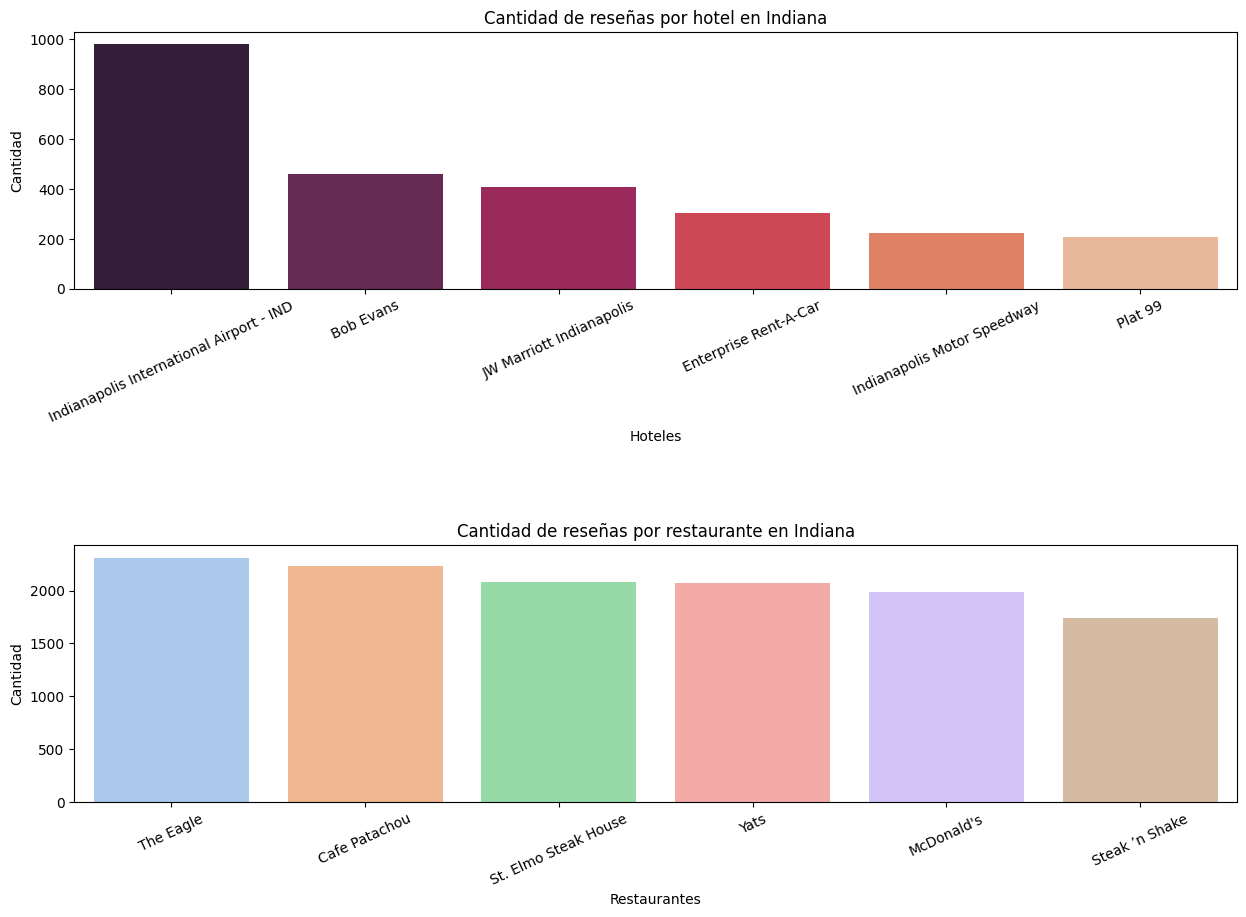

In [22]:
fig,ax = plt.subplots(2,1,figsize=(15,10))
fig.subplots_adjust(hspace=1)
ax[0].tick_params(axis='x', rotation=25)
ax[0].set(xlabel="Hoteles",ylabel="Cantidad", title="Cantidad de reseñas por hotel en Indiana")
sns.barplot(hotels_yelp_in["name"].value_counts()[0:6],ax=ax[0], palette="rocket")

ax[1].tick_params(axis='x', rotation=25)
ax[1].set(xlabel="Restaurantes",ylabel="Cantidad", title="Cantidad de reseñas por restaurante en Indiana")
sns.barplot(restaurant_yelp_in["name"].value_counts()[0:6],ax=ax[1], palette="pastel")



plt.show()

In [23]:
hotels_yelp_la = lousiana_yelp[lousiana_yelp["categories"].str.contains("Hotel|hotel")]
restaurant_yelp_la = lousiana_yelp[lousiana_yelp["categories"].str.contains("Restaurant|restaurant")]

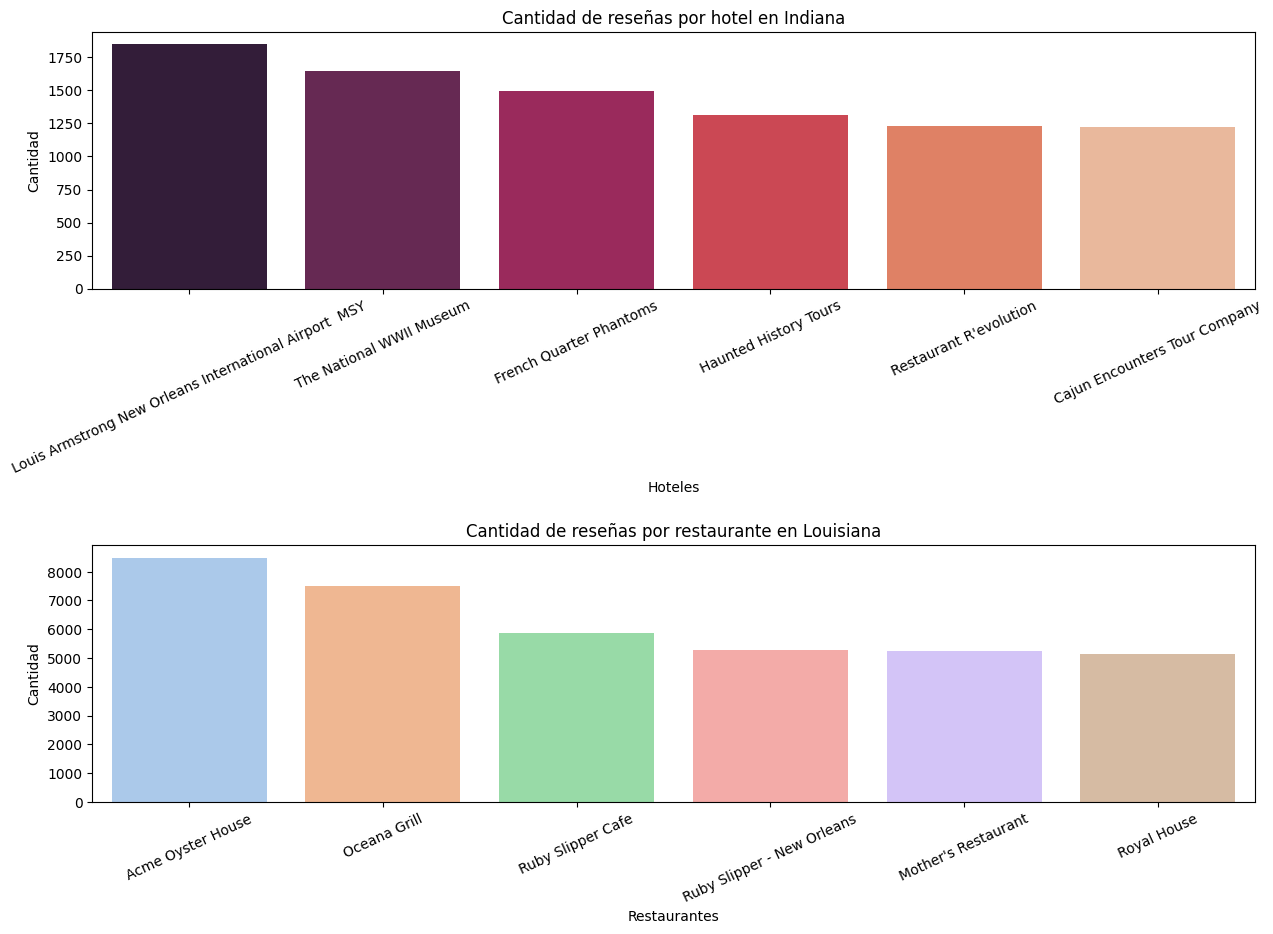

In [24]:
fig,ax = plt.subplots(2,1,figsize=(15,10))
fig.subplots_adjust(hspace=1)
ax[0].tick_params(axis='x', rotation=25)
ax[0].set(xlabel="Hoteles",ylabel="Cantidad", title="Cantidad de reseñas por hotel en Indiana")
sns.barplot(hotels_yelp_la["name"].value_counts()[0:6],ax=ax[0], palette="rocket")

ax[1].tick_params(axis='x', rotation=25)
ax[1].set(xlabel="Restaurantes",ylabel="Cantidad", title="Cantidad de reseñas por restaurante en Louisiana")
sns.barplot(restaurant_yelp_la["name"].value_counts()[0:6],ax=ax[1], palette="pastel")



plt.show()